In [1]:
import linopy
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
from shapely import wkt
import numpy as np

In [2]:
mwperkm2_wind = 4.5 ## originally 9 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET
mwperkm2_solar = 15 ## originally 30 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET

maxcapacityfor_spp = 90
maxcapacityfor_vspp = 10

radius_spp_wind = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_wind * 3.14)) / 100,5)
radius_vspp_wind = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_wind * 3.14)) / 100,5)

radius_spp_solar = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_solar * 3.14)) / 100,5)
radius_vspp_solar = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_solar * 3.14)) / 100,5)

print('radius_spp_wind km = ',radius_spp_wind*100,' buffer = ',radius_spp_wind)
print('radius_vspp_wind km = ',radius_vspp_wind*100,' buffer = ',radius_vspp_wind)
print('radius_spp_solar km = ',radius_spp_solar*100,' buffer = ',radius_spp_solar)
print('radius_vspp_solar km = ',radius_vspp_solar*100,' buffer = ',radius_vspp_solar)

radius_spp_wind km =  2.524  buffer =  0.02524
radius_vspp_wind km =  0.8410000000000001  buffer =  0.00841
radius_spp_solar km =  1.3820000000000001  buffer =  0.01382
radius_vspp_solar km =  0.461  buffer =  0.00461


In [3]:
scenario_SI = 2

xr_out = xr.open_dataset('Output\\xr_output_scenario_SI_' + str(scenario_SI) + '_.nc')
print(xr_out)
print("cap_wind = ",xr_out['cap_wind'].sum())
print("cap_solar = ",xr_out['cap_solar'].sum())

<xarray.Dataset>
Dimensions:       (lat: 1069, lon: 597)
Coordinates:
  * lat           (lat) float64 5.621 5.635 5.649 5.663 ... 20.43 20.44 20.45
  * lon           (lon) float64 97.35 97.37 97.38 97.39 ... 105.6 105.6 105.6
Data variables:
    SI_Solar      (lat, lon) float64 ...
    SI_Wind       (lat, lon) float64 ...
    AVA_Wind      (lat, lon) float32 ...
    AVA_Solar     (lat, lon) float32 ...
    SI_Wind_max   (lat, lon) float64 ...
    SI_Wind_min   (lat, lon) float64 ...
    SI_Solar_max  (lat, lon) float64 ...
    SI_Solar_min  (lat, lon) float64 ...
    ADM1_EN       (lat, lon) object ...
    region        (lat, lon) object ...
    cap_wind      (lat, lon) float64 ...
    cap_solar     (lat, lon) float64 ...
cap_wind =  <xarray.DataArray 'cap_wind' ()>
array(11557.89026427)
cap_solar =  <xarray.DataArray 'cap_solar' ()>
array(1077640.23269305)


In [4]:
df_wind = xr_out.to_dataframe()
df_wind.reset_index(inplace=True)
df_wind = gpd.GeoDataFrame(df_wind, geometry =gpd.points_from_xy(df_wind['lon'],df_wind['lat']))
df_wind.crs = {'init': 'epsg:4326'}
print(len(df_wind))
for i,c in enumerate(df_wind.columns):
    if c not in (['lon','lat','SI_Wind','SI_Wind_max','SI_Wind_min','region','ADM1_EN','cap_wind','AVA_Wind','geometry']):
        df_wind = df_wind.drop(columns=c)

df_wind = df_wind.loc[df_wind['cap_wind'] > 0]
df_wind.reset_index(inplace=True,drop=False)
df_wind.crs = {'init': 'epsg:4326'}
df_wind['buffer'] = df_wind['geometry'].buffer(np.round(np.sqrt(df_wind['cap_wind']/(mwperkm2_wind * 3.14)) / 100,5),cap_style = 3)
df_wind = df_wind.set_geometry('buffer')

df_wind.to_csv('Output\\Output_wind_scenario_SI_' + scenario_SI + '.csv',index=False,encoding="utf-8-sig")

print(df_wind)

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


638193


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


       index        lat         lon   SI_Wind  AVA_Wind  SI_Wind_max  \
0      33697   6.398611  101.031944  0.330757      0.36     2.104214   
1      34294   6.412500  101.031944  0.493162      0.54     2.055503   
2      43831   6.634722  100.823611  0.252751      0.27     2.122997   
3      44428   6.648611  100.823611  0.424747      0.45     2.124115   
4      46224   6.690278  100.893056  0.700717      0.72     2.244311   
...      ...        ...         ...       ...       ...          ...   
1502  537725  18.120833  103.254167  1.203329      1.35     2.006997   
1503  537728  18.120833  103.295833  1.449695      1.62     2.014873   
1504  537740  18.120833  103.462500  1.322416      1.44     2.067760   
1505  537741  18.120833  103.476389  1.571838      1.71     2.069663   
1506  543133  18.245833  103.740278  1.215820      1.35     2.027546   

      SI_Wind_min    ADM1_EN region  cap_wind                    geometry  \
0             0.0       Yala     R3  1.620000   POINT (101

C:\Users\EGAT\AppData\Local\Temp\ipykernel_2904\3203068078.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_wind['buffer'] = df_wind['geometry'].buffer(np.round(np.sqrt(df_wind['cap_wind']/(mwperkm2_wind * 3.14)) / 100,5),cap_style = 3)


In [5]:
df_solar = xr_out.to_dataframe()
df_solar.reset_index(inplace=True)
df_solar = gpd.GeoDataFrame(df_solar, geometry =gpd.points_from_xy(df_solar['lon'],df_solar['lat']))
df_solar.crs = {'init': 'epsg:4326'}
print(len(df_solar))
for i,c in enumerate(df_solar.columns):
    if c not in (['lon','lat','SI_Solar','SI_Solar_max','SI_Solar_min','region','ADM1_EN','cap_solar','AVA_Solar','geometry']):
        df_solar = df_solar.drop(columns=c)

df_solar = df_solar.loc[df_solar['cap_solar'] > 0]
df_solar.reset_index(inplace=True,drop=False)
df_solar.crs = {'init': 'epsg:4326'}
df_solar['buffer'] = df_solar['geometry'].buffer(np.round(np.sqrt(df_solar['cap_solar']/(mwperkm2_solar * 3.14)) / 100,5),cap_style = 3)
df_solar = df_solar.set_geometry('buffer')

df_solar.to_csv('Output\\Output_solar_scenario_SI_' + scenario_SI + '.csv',index=False,encoding="utf-8-sig")

print(df_solar)

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


638193


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_2904\2901230425.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_solar['buffer'] = df_solar['geometry'].buffer(np.round(np.sqrt(df_solar['cap_solar']/(mwperkm2_solar * 3.14)) / 100,5),cap_style = 3)


        index        lat         lon  SI_Solar  AVA_Solar  SI_Solar_max  \
0       12265   5.898611  101.865278  0.551535       0.54      2.299054   
1       12266   5.898611  101.879167  0.653764       0.63      2.384187   
2       12861   5.912500  101.851389  0.161056       0.18      2.013350   
3       12862   5.912500  101.865278  0.080546       0.09      2.013638   
4       12864   5.912500  101.893056  0.347600       0.36      2.387053   
...       ...        ...         ...       ...        ...           ...   
81391  635405  20.398611  100.087500  0.163624       0.18      2.045557   
81392  635406  20.398611  100.101389  1.123648       1.17      2.171854   
81393  635407  20.398611  100.115278  0.260293       0.27      2.169571   
81394  636003  20.412500  100.101389  0.337812       0.36      2.169057   
81395  636004  20.412500  100.115278  1.016180       1.08      2.118319   

       SI_Solar_min     ADM1_EN region  cap_solar                    geometry  \
0               0.

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


total wind capacity =  11557.890264273177


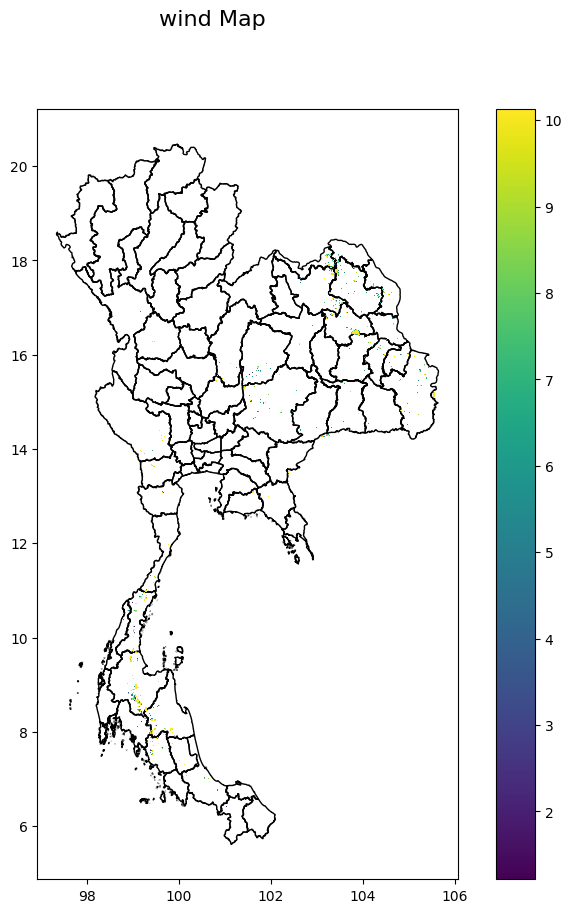

In [6]:
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}

print("total wind capacity = ", df_wind['cap_wind'].sum())

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('wind Map', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_wind.plot(ax = ax,legend=True,zorder = 1,column = 'cap_wind')
except:
    None

total solar capacity =  1077640.2326930491


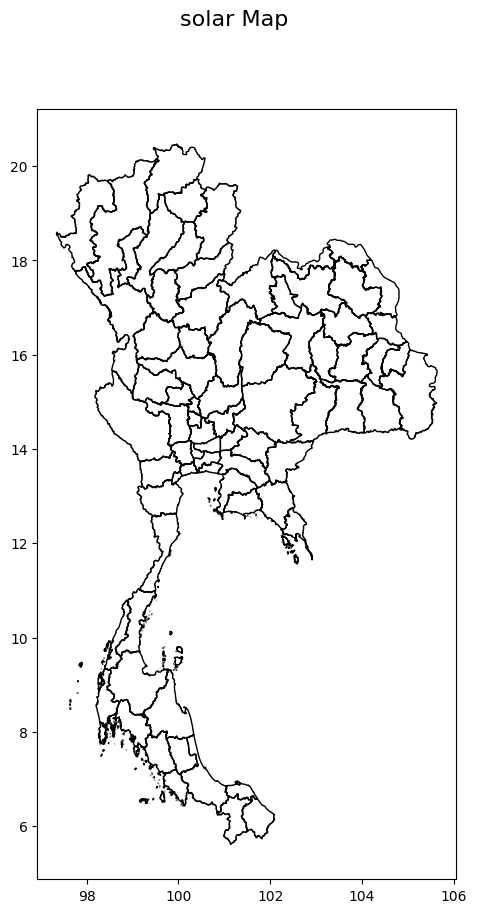

In [7]:
print("total solar capacity = ", df_solar['cap_solar'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('solar Map', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_solar.plot(ax = ax,legend=True,zorder = 1,column = 'cap_SPP_solar')
except:
    None


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


total wind capacity =  1368.49502272904
total solar capacity =  20871.00072830733


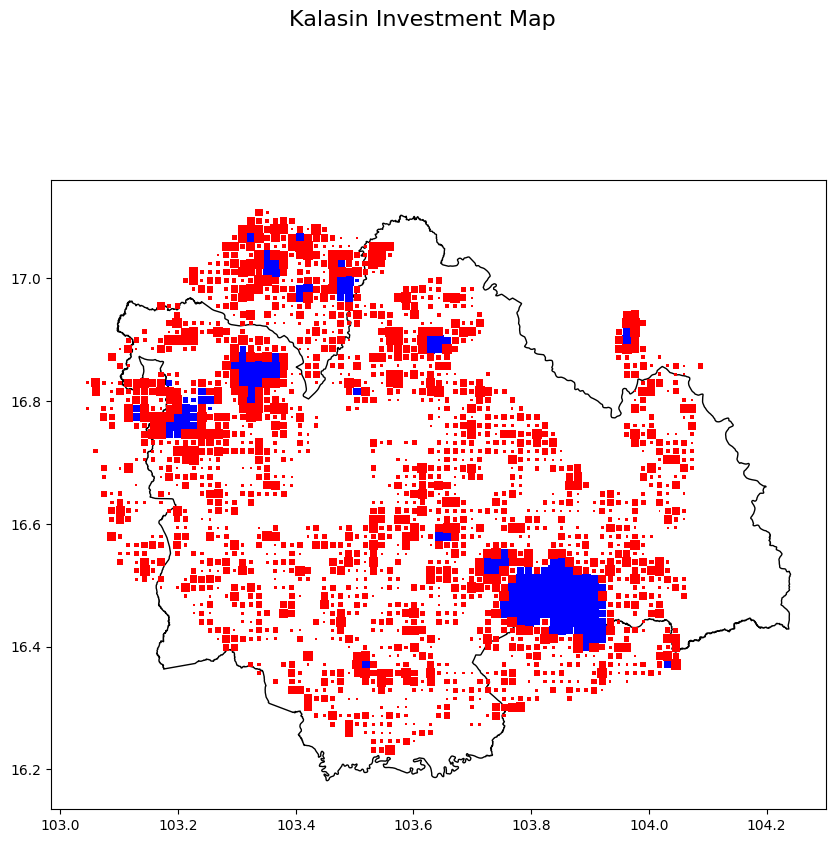

In [8]:
province = 'Kalasin'
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}
specificarea = thailandmap.loc[thailandmap['ADM1_EN'] == province]
bound = specificarea.unary_union.bounds

print("total wind capacity = ", df_wind['cap_wind'].loc[df_wind['ADM1_EN'] == province].sum())

print("total solar capacity = ", df_solar['cap_solar'].loc[df_solar['ADM1_EN'] == province].sum())


fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle(province + ' Investment Map ', fontsize=16)
specificarea.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
try:
    df_wind.loc[df_wind['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 1,column = 'cap_wind',color = 'blue')
except:
    None
try:
    df_solar.loc[df_solar['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 3,column = 'cap_solar',color = 'red')
except:
    None
